<center>
    <h1>Mohamed Nasser Aboelnasr</h1>
</center>

In [1]:
import numpy as np
from IPython.display import SVG
from sknetwork.data import karate_club, painters, movie_actor
from sknetwork.ranking import PageRank, BiPageRank
from sknetwork.visualization import svg_graph, svg_digraph, svg_bigraph
from sknetwork.utils import projection_simplex , sparse

In [2]:
# This function return markov matrix (transition propability matrix) 
def get_markov_mat(adjc) :  
    x_csr=sparse.csr_matrix(adjc)
    x_proj = projection_simplex(x_csr)
    return x_proj.toarray()


In [3]:
# This function calculates rank (score) for every page
def pagerank (M, iters = 100, d = 0.85) :
    n=M.shape[1]
    v = np.full((n,1),1/n)
    M_hat = (1 - d) / n + d * M 
    for i in range (iters) :
        v = np.dot(M_hat,v)
    return v

In [4]:
graph = karate_club(metadata=True)
adjacency = graph.adjacency # Here we get adjacency list
position = graph.position

In [5]:
L=adjacency
# Here we are applying the Conv() function that converts the adjacency list into markov matrix
markov_mat=get_markov_mat(L)
pages_scores=pagerank(markov_mat.T,100, 0.85) # Here we get rank for every page
print(pages_scores.T)

[[0.09699729 0.05287692 0.05707851 0.03585986 0.02197795 0.02911115
  0.02911115 0.0244905  0.02976606 0.0143094  0.02197795 0.00956475
  0.01464489 0.02953646 0.01453599 0.01453599 0.01678401 0.01455868
  0.01453599 0.01960464 0.01453599 0.01455868 0.01453599 0.03152251
  0.02107603 0.0210062  0.01504404 0.02563977 0.01957346 0.02628854
  0.02459016 0.03715809 0.07169323 0.10091918]]


# Now let's compare our calculations with what we get from built-in funcions

In [6]:
# Here we create object from PageRank built-in class
pageRank = PageRank()
# Now we call fit_transform function to get the rank of pages from adjacency list
scores = pageRank.fit_transform(adjacency)
print(scores)

[0.09683432 0.05270896 0.05700985 0.03583685 0.02204314 0.02922028
 0.02922028 0.02453786 0.02983147 0.01434684 0.02204314 0.00959139
 0.01467138 0.0296205  0.01460911 0.01460911 0.01682548 0.01460544
 0.01460911 0.01968808 0.01460911 0.01460544 0.01460911 0.03156737
 0.02103777 0.02096294 0.01505913 0.02566555 0.01957931 0.02631547
 0.02465682 0.0372688  0.07127235 0.10032824]


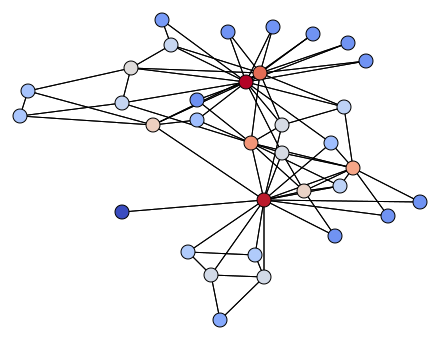

In [7]:
# Here we visually explore the shape of the graph
image = svg_graph(adjacency, position, scores=np.log(scores))
SVG(image)

# Ranking with personalization

In [8]:
seeds = {1: 1, 10: 1}
pageRank = PageRank()

scores = pageRank.fit_transform(adjacency, seeds)

image = svg_graph(adjacency, position, scores=np.log(scores), seeds=seeds)

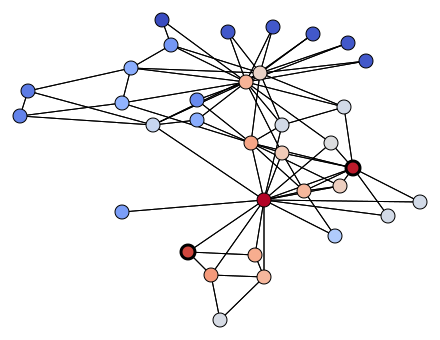

In [9]:
SVG(image)

# Digraphs

In [10]:
graph = painters(metadata=True)
adjacency = graph.adjacency
names = graph.names
position = graph.position

In [11]:
M=adjacency
print(M)

  (0, 3)	True
  (0, 10)	True
  (1, 3)	True
  (1, 12)	True
  (2, 9)	True
  (3, 0)	True
  (3, 1)	True
  (3, 7)	True
  (3, 11)	True
  (3, 12)	True
  (4, 2)	True
  (4, 5)	True
  (4, 9)	True
  (5, 2)	True
  (5, 4)	True
  (5, 8)	True
  (5, 9)	True
  (6, 0)	True
  (6, 13)	True
  (7, 1)	True
  (7, 2)	True
  (7, 3)	True
  (7, 8)	True
  (7, 11)	True
  (7, 12)	True
  (8, 0)	True
  (8, 1)	True
  (8, 4)	True
  (8, 5)	True
  (8, 7)	True
  (8, 10)	True
  (8, 11)	True
  (9, 2)	True
  (9, 4)	True
  (10, 0)	True
  (10, 3)	True
  (10, 8)	True
  (10, 11)	True
  (10, 12)	True
  (11, 0)	True
  (11, 1)	True
  (11, 3)	True
  (11, 10)	True
  (11, 12)	True
  (12, 1)	True
  (12, 3)	True
  (12, 4)	True
  (12, 7)	True
  (13, 6)	True
  (13, 8)	True


# Ranking

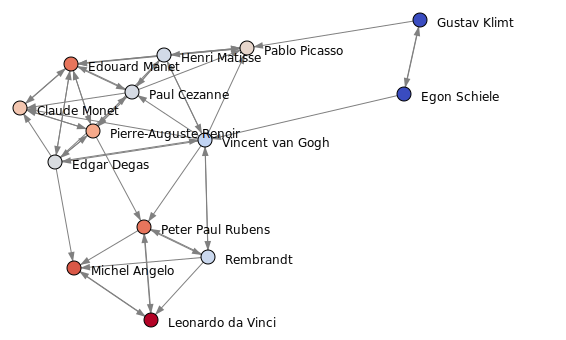

In [12]:
pageRank = PageRank()
scores = pageRank.fit_transform(adjacency)

image = svg_digraph(adjacency, position, scores=np.log(scores), names=names)
SVG(image)

In [13]:
scores

array([0.06039417, 0.06946039, 0.12498877, 0.10953832, 0.11001955,
       0.04712885, 0.01864369, 0.05308844, 0.04487283, 0.15675844,
       0.05081224, 0.05126681, 0.0843838 , 0.01864369])

In [14]:
pagerank(get_markov_mat(M).T)

array([[0.05895998],
       [0.0671977 ],
       [0.12954046],
       [0.10584829],
       [0.11297236],
       [0.04813788],
       [0.01863354],
       [0.051436  ],
       [0.04459214],
       [0.16306181],
       [0.04966197],
       [0.04985256],
       [0.08147176],
       [0.01863354]])

# Ranking with personalization

In [15]:
cezanne = 11
seeds = {cezanne:1}

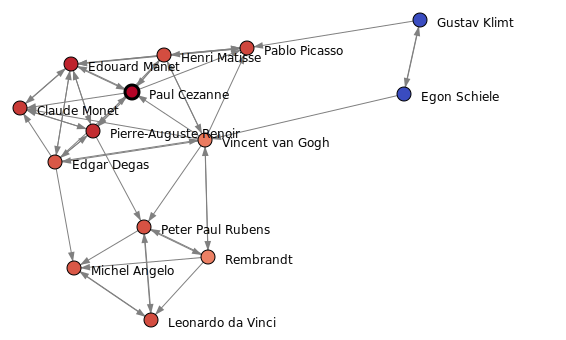

In [16]:
scores = pageRank.fit_transform(adjacency, seeds)

image = svg_digraph(adjacency, position, names, scores=np.log(scores + 1e-6), seeds=seeds)

SVG(image)

# Bigraphs

In [17]:
graph = movie_actor(metadata=True)
biadjacency = graph.biadjacency
names_row = graph.names_row
names_col = graph.names_col

# Ranking

In [18]:
bipagerank = BiPageRank()

drive = 3
aviator = 9
seeds_row={drive: 1, aviator: 1}

In [19]:
bipagerank.fit(biadjacency, seeds_row)
scores_row = bipagerank.scores_row_
scores_col = bipagerank.scores_col_

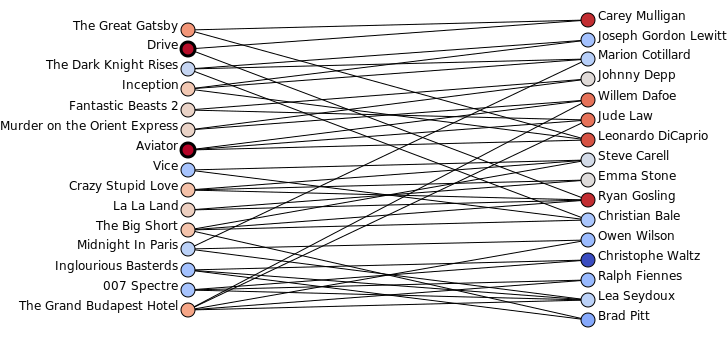

In [20]:
image = svg_bigraph(biadjacency, names_row, names_col,
                    scores_row=np.log(scores_row), scores_col=np.log(scores_col), seeds_row=seeds_row)
SVG(image)

**Creating a directed graph and implementing PageRank**

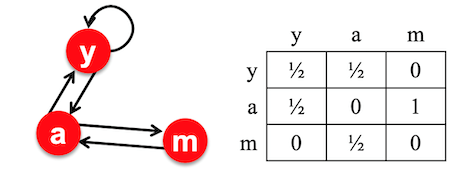

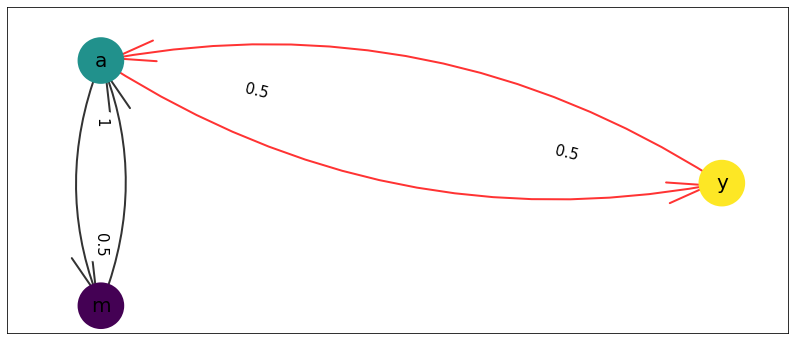


('y', {'a': {0: {'weight': 0.5}}, 'y': {0: {'weight': 0.5, 'label': 'Self loop'}}})
('a', {'y': {0: {'weight': 0.5}}, 'm': {0: {'weight': 0.5}}})
('m', {'a': {0: {'weight': 1}}})


In [21]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import pylab

plt.figure(figsize=(14,6))
G = nx.MultiDiGraph()

G.add_edges_from([('y','a')], weight=0.5)
G.add_edges_from([('y','y')], weight=0.5, label="Self loop")
G.add_edges_from([('a','y')], weight=0.5)
G.add_edges_from([('a','m')], weight=0.5)
G.add_edges_from([('m','a')], weight=1)



val_map = {'y': 1.0,
                   'a': 0.75,
                        'm': 0.5}

values = [val_map.get(node, 0.45) for node in G.nodes()]
edge_labels=dict([((u,v,),d['weight'])
                 for u,v,d in G.edges(data=True)])
red_edges = [('y','a'),('a','y'),('y','y')]
edge_colors = ['black' if not edge in red_edges else 'red' for edge in G.edges()]

pos=nx.circular_layout(G)
nx.draw_networkx_edge_labels(G,pos,edge_labels=edge_labels,label_pos=0.25, font_size=15)
nx.draw_networkx(G,pos,node_color=values,node_size=1000,edgelist=[],font_size=20,linewidths=15)
nx.draw_networkx_edges(G, pos, connectionstyle='arc3,rad=0.2',alpha=0.8,arrowstyle='->,head_length=0.6, head_width=0.15',width=2,edge_color=edge_colors,arrowsize=70)
pylab.show()
print()
for node in G.adjacency():
  print(node)

In [22]:
# Order: y a m
S = np.array([[0.5, 0.5, 0],
              [0.5, 0, 1],
              [0, 0.5, 0]])

In [23]:
pagerank(S)

array([[0.38171773],
       [0.39879458],
       [0.21948769]])